In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#IMPORTS
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import interp1d
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
#UTILS

def plt_resize(x=12, y=7):
  plt.figure(figsize=(x,y))

def get_dict_key_at_idx(my_dict, idx=0):
  if not isinstance(my_dict, dict):
    raise ValueError("Invalid arguments given: dictionary is not of type 'dict'") 
  if not isinstance(idx, int):
    raise ValueError("Invalid arguments given: index is not of type 'int'")  

  return list(my_dict.keys())[idx]    

def interpolated_1D(df, cols, intpl_type='cubic', intvl=1):

      df = df.copy()

      new_df = pd.DataFrame()

      df.dropna(inplace=True)

      new_idx = np.arange(df.index[0], df.index[-1] + intvl, intvl)


      for col in cols:
        intplt1d = interp1d([int(idx) for idx in df.index], df[col], kind=intpl_type)

        new_df[col] = intplt1d(new_idx)


      new_df.set_index(new_idx, inplace=True)   

      return new_df


# Gender gap data

In [ ]:
#about the dataset lies at the first key, the data in the second
gender_gap_df_dict = pd.read_excel('/content/drive/My Drive/maryam/WEF_GGGR_Dataset_2016 (1).xlsx', sheet_name=None)

In [ ]:
# Saving the keys as consts so as to avoid duplication of these consts in the code

# about this dataset on the zeroth index
about = get_dict_key_at_idx(gender_gap_df_dict, 0)

# GGGR 2016 Data on the first index
data = get_dict_key_at_idx(gender_gap_df_dict,1)



In [ ]:
gender_gap_df_dict[data]

,The Global Gender Gap Report 2016 Dataset © 2016 World Economic Forum,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,IMPORTANT The storage on any data retrieval sy...,Overall Index,NaN,Economic Participation and Opportunity Subindex,NaN,Educational Attainment Subindex,NaN,Health and Survival Subindex,NaN,Political Empowerment Subindex,NaN
1,Country,score,rank,score,rank,score,rank,score,rank,score,rank
2,Iceland,0.87367,1,0.806184,9,1,1,0.969801,104,0.718696,1
3,Finland,0.845047,2,0.793658,16,1,1,0.979558,1,0.606971,2
4,Norway,0.841951,3,0.818156,7,0.999801,28,0.974075,68,0.575774,3
...,...,...,...,...,...,...,...,...,...,...,...
141,Chad,0.586693,140,0.667051,74,0.618352,144,0.968133,111,0.0932349,111
142,Saudi Arabia,0.582871,141,0.328045,142,0.960768,105,0.965882,128,0.0767906,121
143,Syria,0.567311,142,0.273224,144,0.963289,103,0.970179,101,0.0625513,130
144,Pakistan,0.555905,143,0.319604,143,0.810829,135,0.96664,124,0.126549,90


In [ ]:
gender_gap_df_dict[data].iloc[0].values

array(['IMPORTANT The storage on any data retrieval system and the commercial use of the present dataset, or portions of it, is strictly prohibited without prior permission of the data providers. See the Terms of Use in the "About this Dataset" tab.',
       'Overall Index', nan,
       'Economic Participation and Opportunity Subindex', nan,
       'Educational Attainment Subindex', nan,
       'Health and Survival Subindex', nan,
       'Political Empowerment Subindex', nan], dtype=object)

Formatting the Gender Gap DataFrame 


In [ ]:
gender_gap_df_columns = ['Country',
'Overall Index Score', 'Overall Index Rank',
'Economic Participation and Opportunity Subindex Score', 'Economic Participation and Opportunity Subindex Rank',
'Educational Attainment Subindex Score', 'Educational Attainment Subindex Rank',
'Health and Survival Subindex Score', 'Health and Survival Subindex Rank',
'Political Empowerment Subindex Score', 'Political Empowerment Subindex Rank']

In [ ]:
def finder(string, word):
  return word in string

In [ ]:
#seggregating score columns as well as rank columns 
score_cols = [col for col in gender_gap_df_columns if finder(col, 'Score') ]
rank_cols = [col for col in gender_gap_df_columns if finder(col, 'Rank') ]

In [ ]:
#setting to the newly ascribed columns
gender_gap_df_dict[data].columns=gender_gap_df_columns

In [ ]:
gender_gap_df_dict[data] = gender_gap_df_dict[data].iloc[2:].reset_index(drop=True)

Analyzing the different indexes in the gender gap data

In [ ]:
gender_gap_df_dict[data].set_index('Country', inplace=True)

In [ ]:
gender_gap_df_dict[data]

,Overall Index Score,Overall Index Rank,Economic Participation and Opportunity Subindex Score,Economic Participation and Opportunity Subindex Rank,Educational Attainment Subindex Score,Educational Attainment Subindex Rank,Health and Survival Subindex Score,Health and Survival Subindex Rank,Political Empowerment Subindex Score,Political Empowerment Subindex Rank
Country,,,,,,,,,,
Iceland,0.87367,1,0.806184,9,1,1,0.969801,104,0.718696,1
Finland,0.845047,2,0.793658,16,1,1,0.979558,1,0.606971,2
Norway,0.841951,3,0.818156,7,0.999801,28,0.974075,68,0.575774,3
Sweden,0.815413,4,0.802349,11,0.999233,36,0.973884,69,0.486186,6
Rwanda,0.799811,5,0.816934,8,0.95783,110,0.972313,89,0.452167,8
...,...,...,...,...,...,...,...,...,...,...
Chad,0.586693,140,0.667051,74,0.618352,144,0.968133,111,0.0932349,111
Saudi Arabia,0.582871,141,0.328045,142,0.960768,105,0.965882,128,0.0767906,121
Syria,0.567311,142,0.273224,144,0.963289,103,0.970179,101,0.0625513,130


(0.0, 1.3)

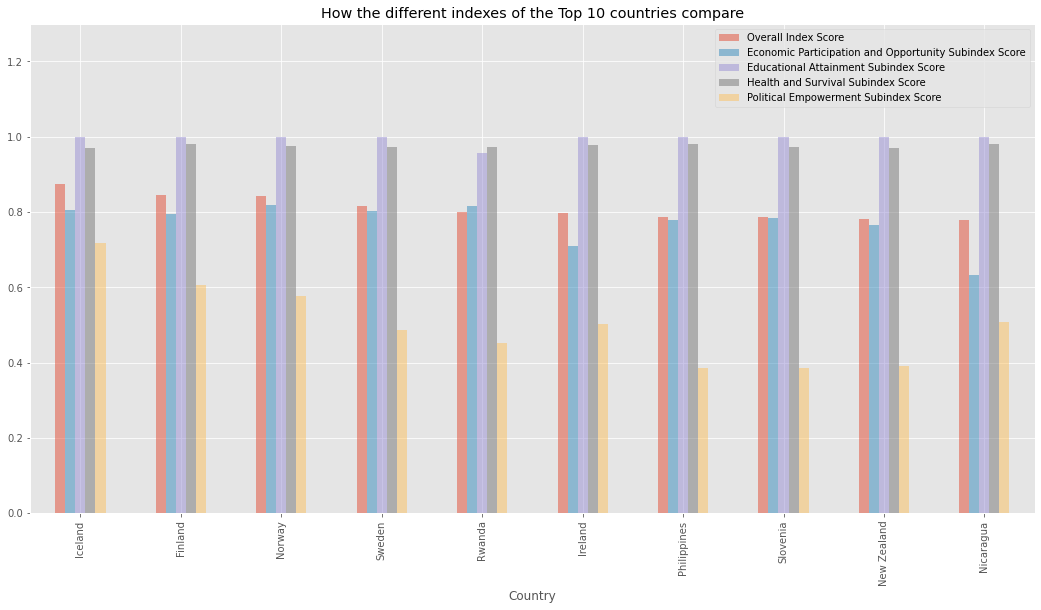

In [ ]:
title = 'How the different indexes of the Top 10 countries compare'
ax = gender_gap_df_dict[data][score_cols].head(10).plot.bar(figsize=(18, 9), title = title, alpha=0.5)
ax.set_ylim(0,1.3)

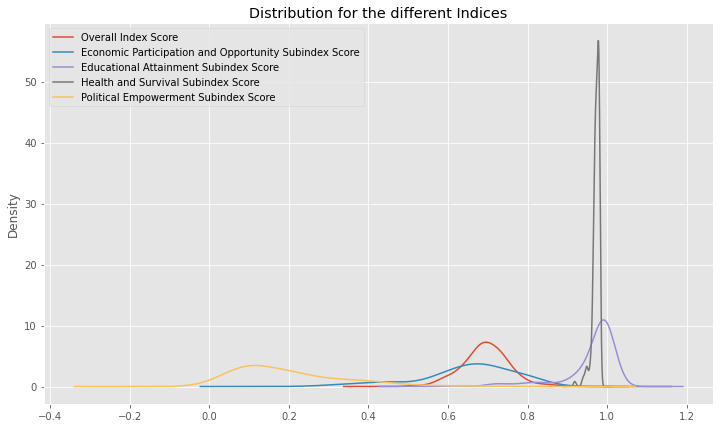

In [ ]:
# Let's also get an insight into how the various indexes are distributed

gender_gap_df_dict[data][score_cols].plot(kind='kde', figsize=(12,7), title = 'Distribution for the different Indices')

In [ ]:
# Let's see how these different indexes compare with eachother

gender_gap_df_dict[data] = gender_gap_df_dict[data].infer_objects()

In [ ]:
gender_gap_df_dict[data].info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, Iceland to Yemen
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Overall Index Score                                    144 non-null    float64
 1   Overall Index Rank                                     144 non-null    int64  
 2   Economic Participation and Opportunity Subindex Score  144 non-null    float64
 3   Economic Participation and Opportunity Subindex Rank   144 non-null    int64  
 4   Educational Attainment Subindex Score                  144 non-null    float64
 5   Educational Attainment Subindex Rank                   144 non-null    int64  
 6   Health and Survival Subindex Score                     144 non-null    float64
 7   Health and Survival Subindex Rank                      144 non-null    int64  
 8   Political Empowerment Subindex Score           

In [ ]:
gender_gap_df_dict[data][score_cols].corr()

,Overall Index Score,Economic Participation and Opportunity Subindex Score,Educational Attainment Subindex Score,Health and Survival Subindex Score,Political Empowerment Subindex Score
Overall Index Score,1.000000,0.724800,0.501646,0.321126,0.778389
Economic Participation and Opportunity Subindex Score,0.724800,1.000000,0.153302,0.197878,0.249777
Educational Attainment Subindex Score,0.501646,0.153302,1.000000,0.228111,0.184617
Health and Survival Subindex Score,0.321126,0.197878,0.228111,1.000000,0.185904
Political Empowerment Subindex Score,0.778389,0.249777,0.184617,0.185904,1.000000


In [ ]:
#Lets see how the different indexes vary with the ranks of different countries

for x_col, y_col in zip(score_cols, rank_cols):
  gender_gap_df_dict[data].plot.scatter(x=x_col,y=y_col, figsize = (12,7), color=colormap[5])

NameError: ignored

In [ ]:
gender_gap_df_dict[data][score_cols].corr()

,Overall Index Score,Economic Participation and Opportunity Subindex Score,Educational Attainment Subindex Score,Health and Survival Subindex Score,Political Empowerment Subindex Score
Overall Index Score,1.000000,0.724800,0.501646,0.321126,0.778389
Economic Participation and Opportunity Subindex Score,0.724800,1.000000,0.153302,0.197878,0.249777
Educational Attainment Subindex Score,0.501646,0.153302,1.000000,0.228111,0.184617
Health and Survival Subindex Score,0.321126,0.197878,0.228111,1.000000,0.185904
Political Empowerment Subindex Score,0.778389,0.249777,0.184617,0.185904,1.000000


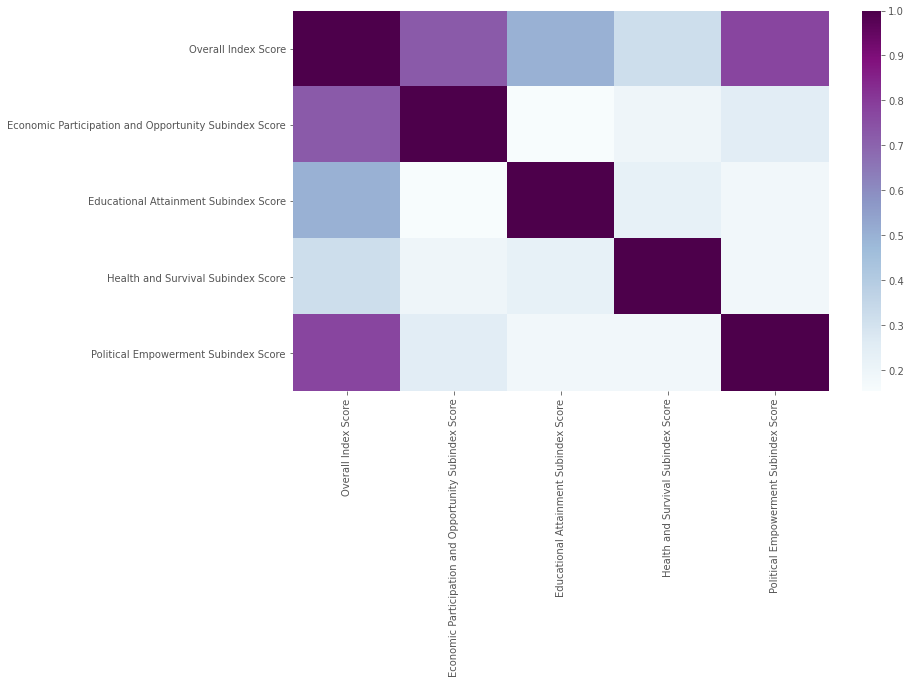

In [ ]:
plt_resize()
sns.heatmap(gender_gap_df_dict[data][score_cols].corr(), cmap="BuPu")
#Economic participation and opportunity subindex and political empowerment subindex are the most positvely correlated to the overall Index score, which determines the position of that country

# Seats held by women in the parliament

In [ ]:
#about the dataset lies at the first key, the data in the second
woman_seats_in_national_parliaments_df_dict = pd.read_excel('/content/drive/My Drive/maryam/proportion_of_seats_held_by_women_in_national_parliaments (1).xls', sheet_name=None)

In [ ]:
#storing the keys
data_woman_parliament_seats = get_dict_key_at_idx(woman_seats_in_national_parliaments_df_dict,0)
meta_data_countires =  get_dict_key_at_idx(woman_seats_in_national_parliaments_df_dict,1)
meta_data_indicators =  get_dict_key_at_idx(woman_seats_in_national_parliaments_df_dict,2)


Formatting the seats held by woman in the parliament data

In [ ]:
woman_seats_in_parliament_cols = woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats].iloc[2].values.tolist()

In [ ]:
woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats].columns = woman_seats_in_parliament_cols 

In [ ]:
woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats] = woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats].iloc[3:].reset_index(drop=True)

In [ ]:
woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats].set_index('Country Name', inplace=True)

In [ ]:
woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats].info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, Aruba to Zimbabwe
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    264 non-null    object 
 1   Indicator Name  264 non-null    object 
 2   Indicator Code  264 non-null    object 
 3   1960.0          0 non-null      float64
 4   1961.0          0 non-null      float64
 5   1962.0          0 non-null      float64
 6   1963.0          0 non-null      float64
 7   1964.0          0 non-null      float64
 8   1965.0          0 non-null      float64
 9   1966.0          0 non-null      float64
 10  1967.0          0 non-null      float64
 11  1968.0          0 non-null      float64
 12  1969.0          0 non-null      float64
 13  1970.0          0 non-null      float64
 14  1971.0          0 non-null      float64
 15  1972.0          0 non-null      float64
 16  1973.0          0 non-null      float64
 17  1974.0          0 non-null     

In [ ]:
def get_columns_against_type_dict(df):

  grouper_dict = {k.name :v for k, v in df.columns.to_series().groupby(df.dtypes).groups.items()}

  return grouper_dict



In [ ]:
woman_seats_in_nat_parl_column_types = get_columns_against_type_dict(woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats])

In [ ]:
# making column groups for the woman_seats_in_the_national_parliament dataset
wsnp_float_cols = woman_seats_in_nat_parl_column_types['float64']
wsnp_obj_cols = woman_seats_in_nat_parl_column_types['object']

In [ ]:
#removing the years with no data i.e NULL columns
total_worldwide_seats_per_year = woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats][wsnp_float_cols].sum()

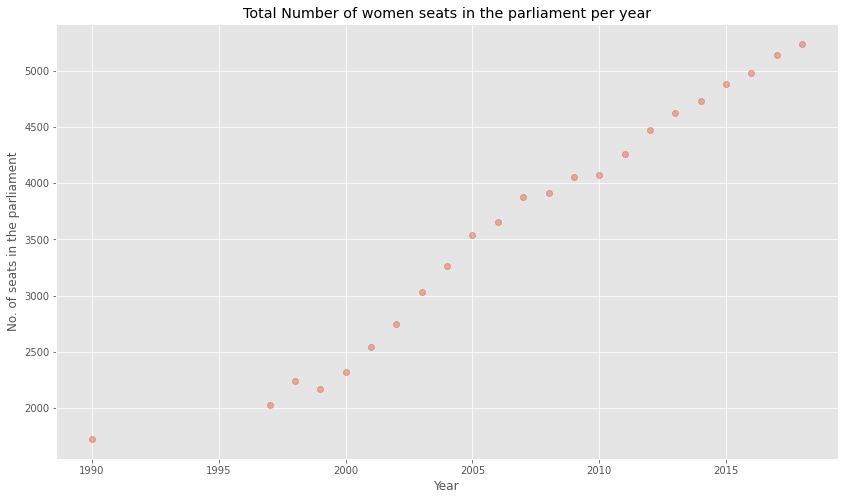

In [ ]:
plt.title("Total Number of women seats in the parliament per year")
plt.xlabel("Year")
plt.ylabel("No. of seats in the parliament")
total_worldwide_seats_per_year[total_worldwide_seats_per_year > 0].plot(style='o', figsize=(14,8), alpha=0.4)

In [ ]:
country_wise_most_parliament_seats = woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats][wsnp_float_cols].T.sum().sort_values()

In [ ]:
#Top 10 countties with the most female seats in the parliament

top_k_countries_with_the_most_female_rep_in_parl = country_wise_most_parliament_seats[-10:].index.tolist()



In [ ]:
colormap = ['#acf2db','#66fffa','#00a8c2','#ffffa1','#93bff5','#b1bcfc','#cc99ff','#fae8ff','#ffbde8','#e848b0']

In [ ]:
len(colormap)

10

In [ ]:
top_k_countries_woman_parl_seats_data = woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats][wsnp_float_cols].T[top_k_countries_with_the_most_female_rep_in_parl]

In [ ]:
color_cols_mapper = dict(zip(top_k_countries_woman_parl_seats_data.columns, colormap))

In [ ]:
top_k_countries_woman_parl_seats_data


  

Country Name,Spain,South Africa,Denmark,Iceland,Netherlands,Norway,Cuba,Finland,Sweden,Rwanda
1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
top_k_countries_woman_parl_seats_data.set_index(top_k_countries_woman_parl_seats_data.index.astype(int), inplace=True)

In [ ]:
top_k_countries_woman_parl_seats_data.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018],
           dtype='int64')

In [ ]:
temp = interpolated_1D(top_k_countries_woman_parl_seats_data.loc[1997:], top_k_countries_woman_parl_seats_data.columns, intvl=0.1)

In [ ]:
temp

,Spain,South Africa,Denmark,Iceland,Netherlands,Norway,Cuba,Finland,Sweden,Rwanda
1997.0,24.700000,25.000000,33.000000,25.400000,31.300000,36.400000,22.800000,33.500000,40.400000,17.100000
1997.1,25.439695,25.523048,33.792603,24.187743,32.172158,36.398084,23.700101,33.036659,40.098408,17.645050
1997.2,25.958855,26.011870,34.492384,23.318304,32.937107,36.396773,24.487749,32.704900,39.882371,18.017979
1997.3,26.278539,26.467381,35.104767,22.764148,33.601539,36.396000,25.170105,32.493990,39.744939,18.237911
1997.4,26.419806,26.890494,35.635178,22.497739,34.172143,36.395697,25.754332,32.393200,39.679161,18.323972
...,...,...,...,...,...,...,...,...,...,...
2017.6,39.375105,42.231281,37.340772,43.044479,35.557218,40.317976,50.624682,42.117498,44.558680,60.558695
2017.7,39.355762,42.258331,37.344936,41.951664,35.596883,40.535243,51.143040,42.105955,44.863148,60.627224
2017.8,39.306329,42.279461,37.355579,40.763359,35.680914,40.786482,51.741512,42.083123,45.219010,60.769021
2017.9,39.222508,42.293680,37.373625,39.479495,35.813793,41.073974,52.425398,42.048104,45.630037,60.990981


In [ ]:
temp  = temp.applymap(lambda v: np.nan if v < 0 else v)

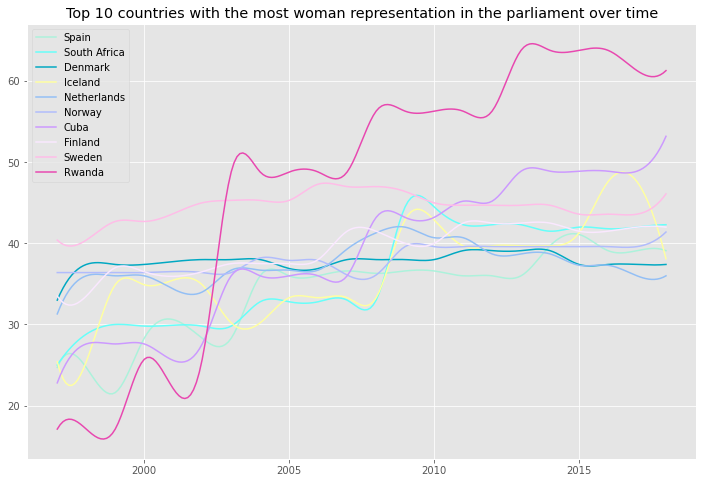

In [ ]:
title = "Top 10 countries with the most woman representation in the parliament over time" 
temp.plot(color=[color_cols_mapper.get(x, '#333333') for x in top_k_countries_woman_parl_seats_data.columns], figsize=(12,8), title=title)
plt.show()

Lets see how do the 

Let see if there is something to pick upon the Gender gap report and the woman in parliament dataset <br>
Since the the gender gap report is available only for the year of 2016, we'll make use of that year alone for any correlations in the data

In [ ]:
woman_seats_in_national_parliament_2016 = woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats][wsnp_float_cols][[2016]].dropna()

In [ ]:
woman_seats_in_national_parliament_2016

,2016.0
Country Name,
Afghanistan,27.70000
Angola,36.80000
Albania,22.90000
Andorra,32.10000
Arab World,18.85265
...,...
Samoa,10.00000
"Yemen, Rep.",0.00000
South Africa,41.80000


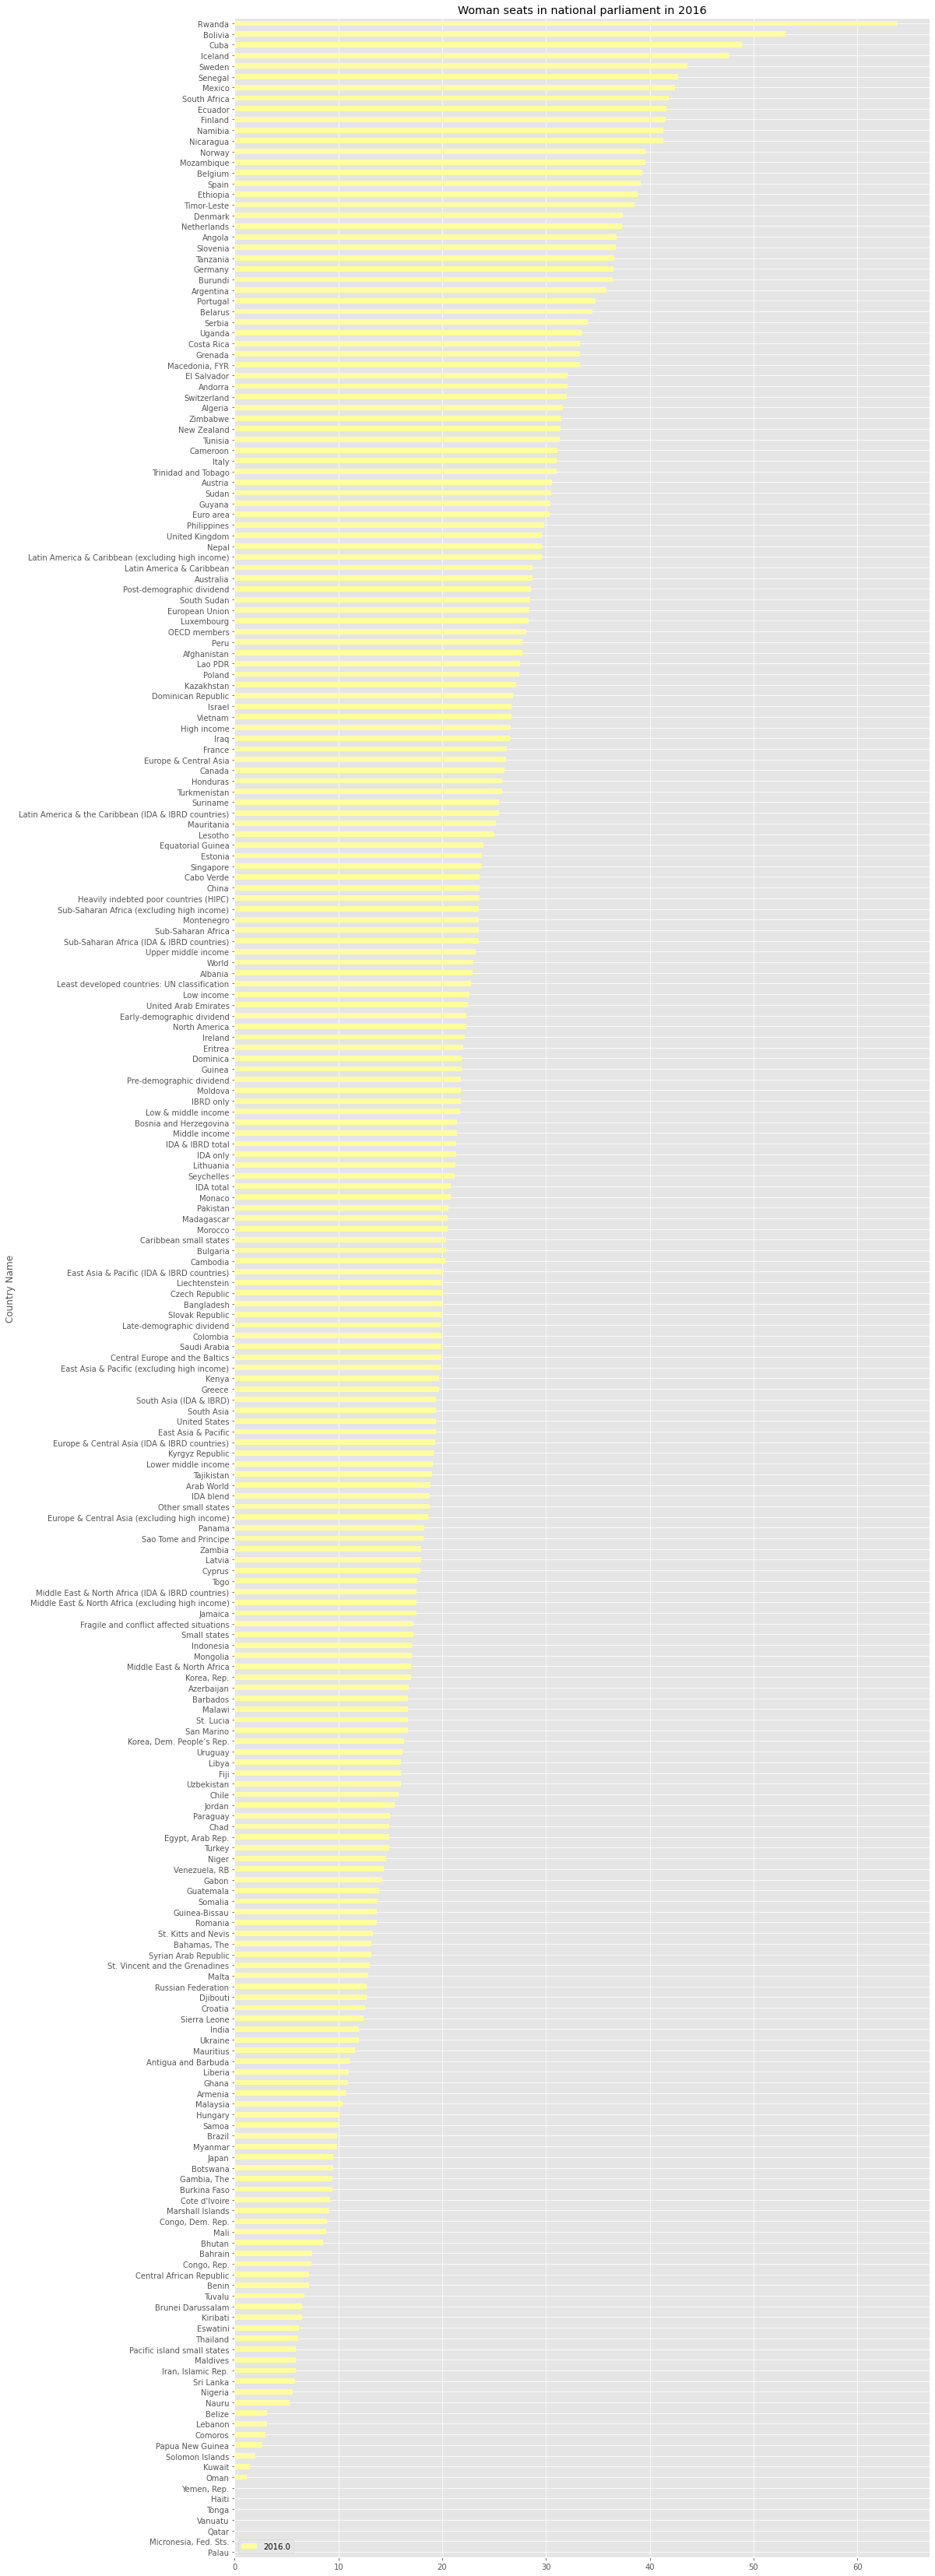

In [ ]:
title = "Woman seats in national parliament in 2016"
woman_seats_in_national_parliament_2016.sort_values(by=2016).plot.barh(figsize=(16,60), color = colormap[3], title=title)

In [ ]:
 gender_gap_df_dict[data]

,Overall Index Score,Overall Index Rank,Economic Participation and Opportunity Subindex Score,Economic Participation and Opportunity Subindex Rank,Educational Attainment Subindex Score,Educational Attainment Subindex Rank,Health and Survival Subindex Score,Health and Survival Subindex Rank,Political Empowerment Subindex Score,Political Empowerment Subindex Rank
Country,,,,,,,,,,
Iceland,0.873670,1,0.806184,9,1.000000,1,0.969801,104,0.718696,1
Finland,0.845047,2,0.793658,16,1.000000,1,0.979558,1,0.606971,2
Norway,0.841951,3,0.818156,7,0.999801,28,0.974075,68,0.575774,3
Sweden,0.815413,4,0.802349,11,0.999233,36,0.973884,69,0.486186,6
Rwanda,0.799811,5,0.816934,8,0.957830,110,0.972313,89,0.452167,8
...,...,...,...,...,...,...,...,...,...,...
Chad,0.586693,140,0.667051,74,0.618352,144,0.968133,111,0.093235,111
Saudi Arabia,0.582871,141,0.328045,142,0.960768,105,0.965882,128,0.076791,121
Syria,0.567311,142,0.273224,144,0.963289,103,0.970179,101,0.062551,130


In [ ]:
woman_seats_in_national_parliament_2016.index.isin(gender_gap_df_dict[data].index).sum()

135

In [ ]:
# The Index class now subclasses the StringAccessorMixin, which means that you can apply in built string operations on it - also index operations can also be applied as df.index.map(fn_lo)
superset = set(gender_gap_df_dict[data].index.str.lower())

In [ ]:
sum(1 if c_name.lower() in superset else 0 for c_name in woman_seats_in_national_parliament_2016.index)

135

In [ ]:
# merged data for the womans seats as well as gender gap data for the 2016 years
merged_woman_seats_and_gender_gap_data_2016 = woman_seats_in_national_parliament_2016.merge(right=gender_gap_df_dict[data], right_on=gender_gap_df_dict[data].index, how='inner', left_on=woman_seats_in_national_parliament_2016.index)

In [ ]:
#renaming the seats and country columns to make them look more meaningful

merged_woman_seats_and_gender_gap_data_2016 = merged_woman_seats_and_gender_gap_data_2016.rename(columns={2016:'Number of woman seats in parliament', 'key_0': 'Country'})

In [ ]:
# Gonna make a subset df of the required columns to make it look more succinct
required_columns = score_cols + ['Number of woman seats in parliament', 'Country']

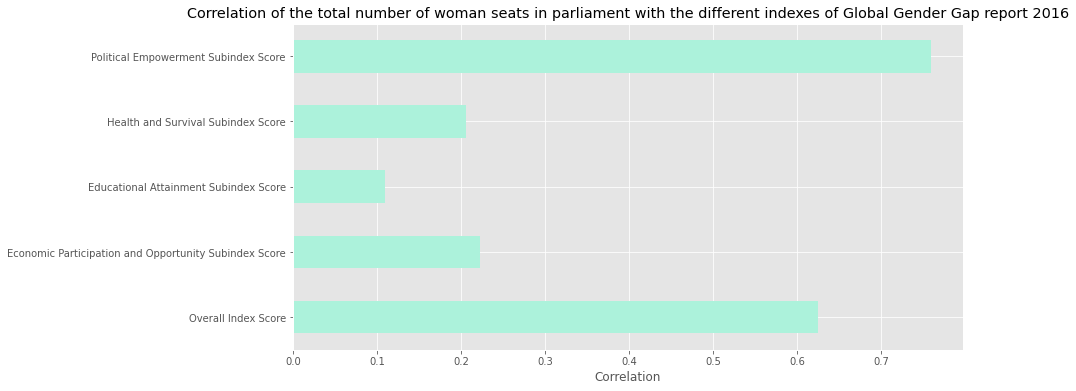

In [ ]:
#lets see how closely are the different index scores correlated with the number of seats occupied by woman from different countries in the parliament
merged_corr_df = merged_woman_seats_and_gender_gap_data_2016[required_columns].corr()
title = "Correlation of the total number of woman seats in parliament with the different indexes of Global Gender Gap report 2016"
plt.xlabel('Correlation')
merged_corr_df[merged_corr_df.index.isin(score_cols)]['Number of woman seats in parliament'].plot.barh(color=colormap[0], figsize=(12,6), title = title)

In [ ]:
gender_gap_df_dict[data]

,Overall Index Score,Overall Index Rank,Economic Participation and Opportunity Subindex Score,Economic Participation and Opportunity Subindex Rank,Educational Attainment Subindex Score,Educational Attainment Subindex Rank,Health and Survival Subindex Score,Health and Survival Subindex Rank,Political Empowerment Subindex Score,Political Empowerment Subindex Rank
Country,,,,,,,,,,
Iceland,0.873670,1,0.806184,9,1.000000,1,0.969801,104,0.718696,1
Finland,0.845047,2,0.793658,16,1.000000,1,0.979558,1,0.606971,2
Norway,0.841951,3,0.818156,7,0.999801,28,0.974075,68,0.575774,3
Sweden,0.815413,4,0.802349,11,0.999233,36,0.973884,69,0.486186,6
Rwanda,0.799811,5,0.816934,8,0.957830,110,0.972313,89,0.452167,8
...,...,...,...,...,...,...,...,...,...,...
Chad,0.586693,140,0.667051,74,0.618352,144,0.968133,111,0.093235,111
Saudi Arabia,0.582871,141,0.328045,142,0.960768,105,0.965882,128,0.076791,121
Syria,0.567311,142,0.273224,144,0.963289,103,0.970179,101,0.062551,130


# GDP data

In [ ]:
# Let's now load the GDP data and start having a look at what it looks like

In [ ]:
gdp_2017_df = pd.read_excel('/content/drive/My Drive/maryam/GDP (1).xls')

In [ ]:
gdp_2017_df['Unnamed: 5'].unique()

array([nan, 'a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=object)

In [ ]:
gdp_2017_df['Unnamed: 4'].unique()

array([nan, '(millions of', 'US dollars)', 19390604, 12237700.479375,
       4872136.94550759, 3677439.1297766003, 2622433.95960416,
       2600818.2435596497, 2582501.30721642, 2055505.50222473,
       1934797.9374113302, 1653042.79525504, 1577524.1459628502,
       1530750.9231487, 1323421.0724790702, 1311320.01551599,
       1150887.82340418, 1015539.0175365, 851549.299635427,
       826200.282501127, 686738.4, 678887.336848252, 637430.331479469,
       538040.458216997, 526465.839002568, 492681.283049248,
       455302.682985757, 454012.76872358896, 416595.666396636,
       398831.956477937, 382575.085091899, 375745.486520656,
       350850.537827281, 348871.64795964, 341449.340450649,
       333730.76477318, 324871.968807469, 323907.23441234004,
       314710.25951074297, 314457.601859523, 313595.20873665996,
       304951.81849406596, 277075.944401941, 251884.88797276598,
       249723.86248736098, 235369.129337711, 223779.865815183,
       217571.08304599, 215725.534372371, 2118

In [ ]:
gdp_2017_df['Unnamed: 3'].unique()

array([nan, 'Economy', 'United States', 'China', 'Japan', 'Germany',
       'United Kingdom', 'India', 'France', 'Brazil', 'Italy', 'Canada',
       'Russian Federation', 'Korea, Rep.', 'Australia', 'Spain',
       'Mexico', 'Indonesia', 'Turkey', 'Netherlands', 'Saudi Arabia',
       'Switzerland', 'Argentina', 'Sweden', 'Poland', 'Belgium',
       'Thailand', 'Iran, Islamic Rep.', 'Austria', 'Norway',
       'United Arab Emirates', 'Nigeria', 'Israel', 'South Africa',
       'Hong Kong SAR, China', 'Ireland', 'Denmark', 'Singapore',
       'Malaysia', 'Colombia', 'Philippines', 'Pakistan', 'Chile',
       'Finland', 'Bangladesh', 'Egypt, Arab Rep.', 'Vietnam', 'Portugal',
       'Czech Republic', 'Romania', 'Peru', 'New Zealand', 'Greece',
       'Iraq', 'Algeria', 'Qatar', 'Kazakhstan', 'Hungary', 'Angola',
       'Kuwait', 'Sudan', 'Ukraine', 'Morocco', 'Ecuador', 'Puerto Rico',
       'Cuba', 'Slovak Republic', 'Sri Lanka', 'Ethiopia', 'Kenya',
       'Dominican Republic', 'Guatem

In [ ]:
gdp_2017_df['Gross domestic product 2017'].unique()

array([nan, 'Ranking', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199,

In [ ]:
# Removing the irrelevant values as well as NULLS from the columns
gdp_2017_df = gdp_2017_df[gdp_2017_df['Unnamed: 0'].isin(gdp_2017_df['Unnamed: 0'].dropna().unique())]

In [ ]:
gdp_2017_df

,Unnamed: 0,Gross domestic product 2017,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
4,USA,1,NaN,United States,19390604,NaN
5,CHN,2,NaN,China,1.22377e+07,NaN
6,JPN,3,NaN,Japan,4.87214e+06,NaN
7,DEU,4,NaN,Germany,3.67744e+06,NaN
8,GBR,5,NaN,United Kingdom,2.62243e+06,NaN
...,...,...,...,...,...,...
231,SSF,NaN,NaN,Sub-Saharan Africa,1.66977e+06,NaN
232,LIC,NaN,NaN,Low income,575398,NaN
233,LMC,NaN,NaN,Lower middle income,6.51698e+06,NaN
234,UMC,NaN,NaN,Upper middle income,2.21828e+07,NaN


In [ ]:
# Removing columns with entire NULL columns 
gdp_2017_df = gdp_2017_df[list(filter(lambda x: x not in ['Unnamed: 2',  'Unnamed: 5'], list(gdp_2017_df.columns)))]

In [ ]:
#filter columns
columns = ['Country ACR', 'rank', 'Country', 'GDP (US $ - million)']

In [ ]:
# Renaming the columns with the filtered ones

gdp_2017_df.columns = columns

In [ ]:
gdp_2017_df= gdp_2017_df.reset_index(drop=True)

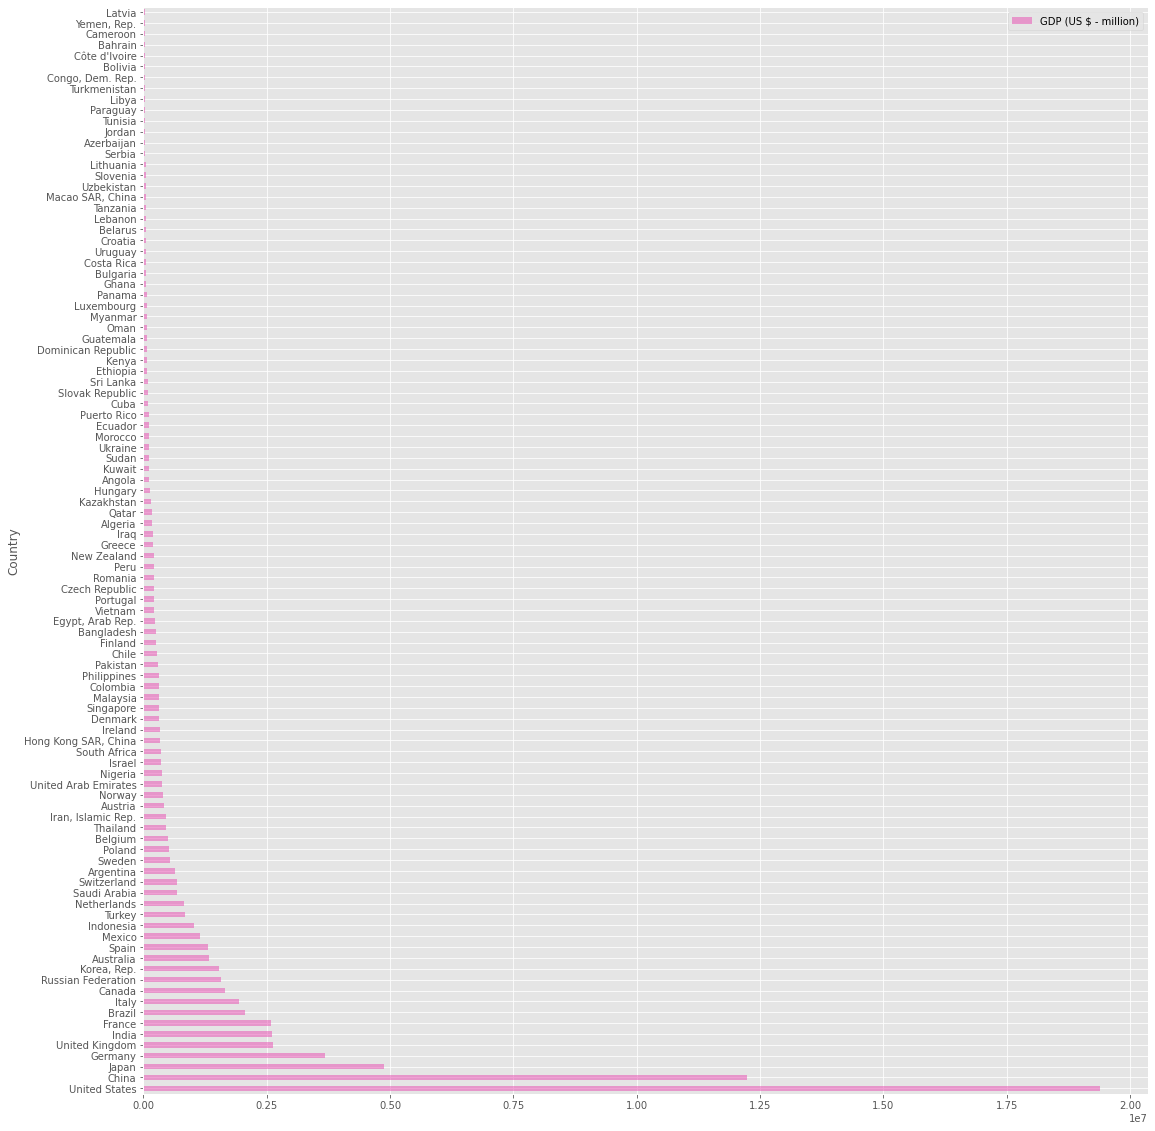

In [ ]:
# Let's see the top 100 countries with the most GDP in 2017
gdp_2017_df[['Country', 'GDP (US $ - million)']].head(100).plot(kind='barh', y='GDP (US $ - million)', x='Country', figsize=(18 , 20), color=colormap[9], alpha=0.5)

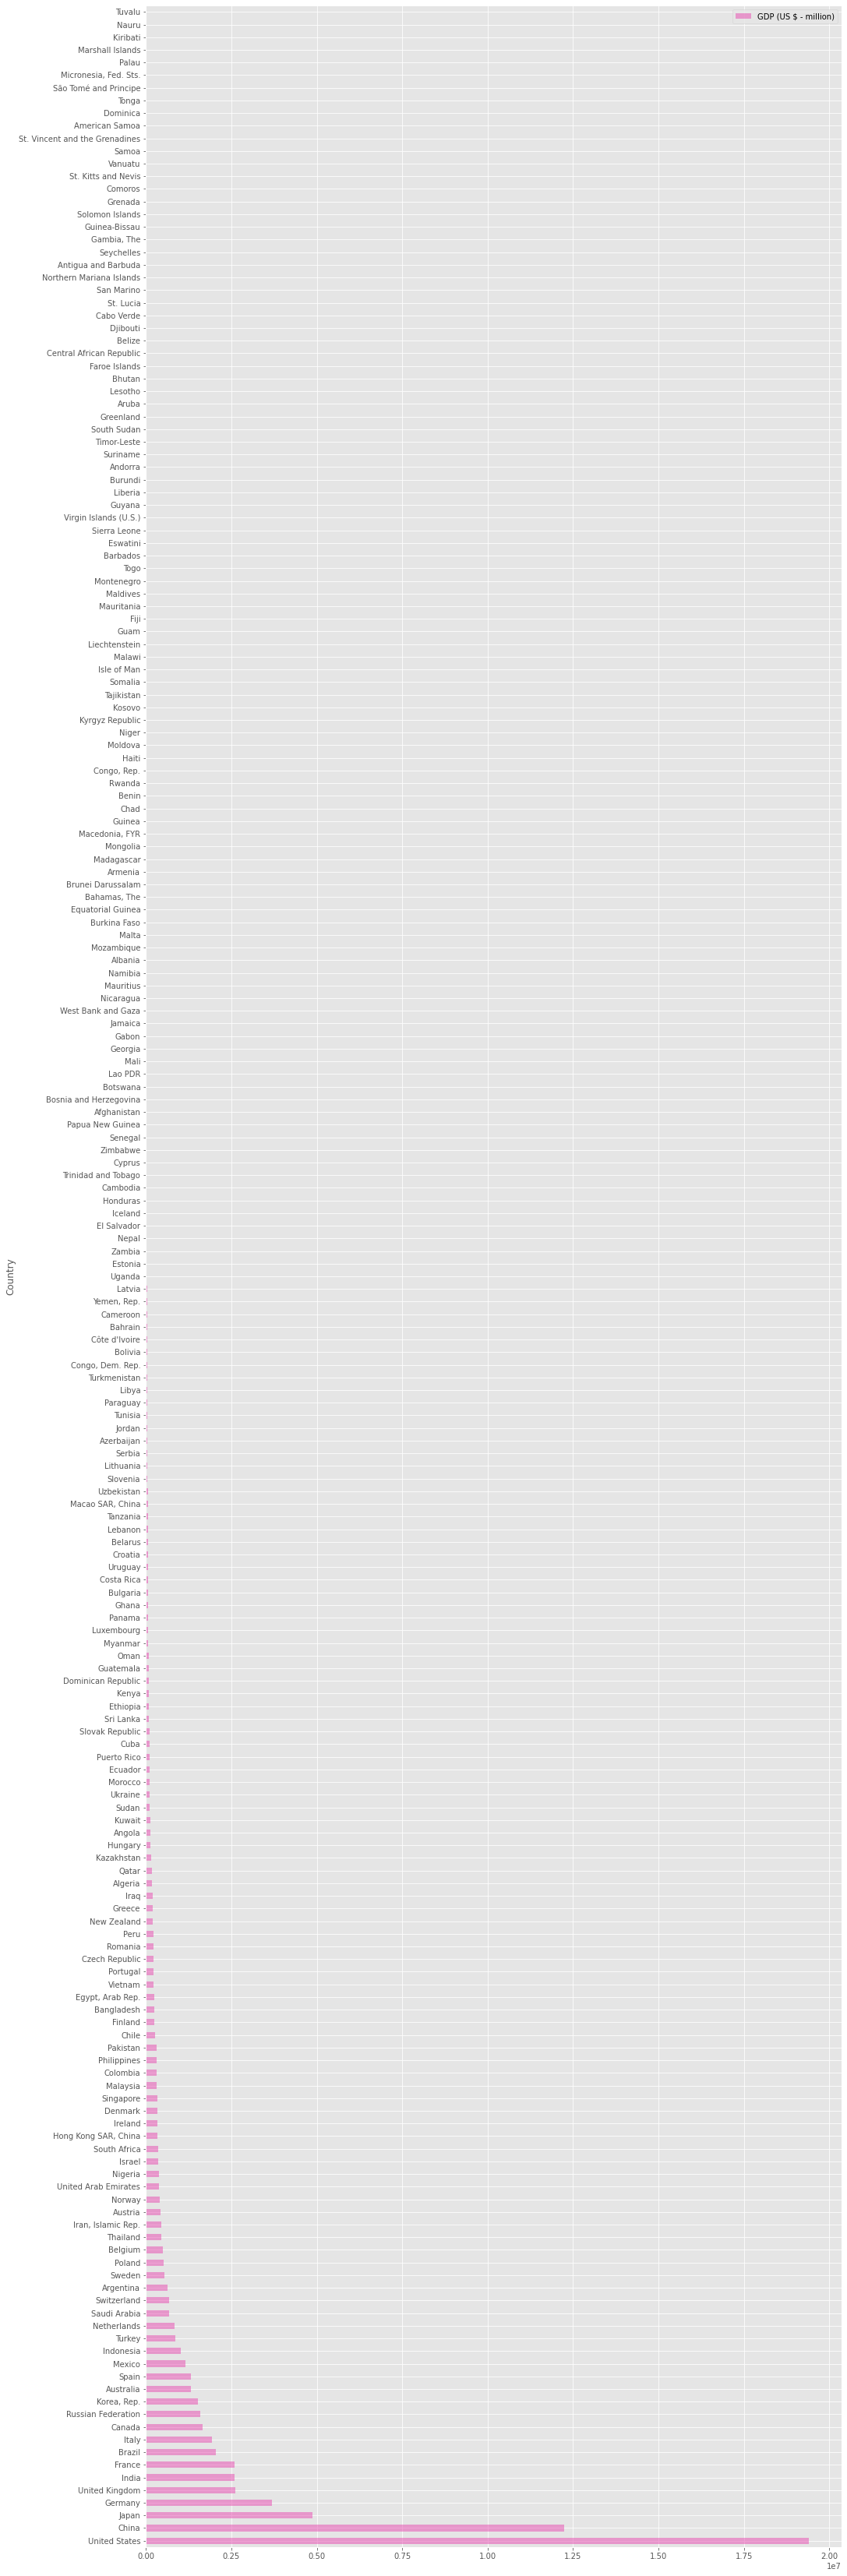

In [ ]:
gdp_2017_df[['Country', 'GDP (US $ - million)']][~gdp_2017_df['rank'].isna()].plot(kind='barh', y='GDP (US $ - million)', x='Country', figsize=(16 , 60), color=colormap[9], alpha=0.5)

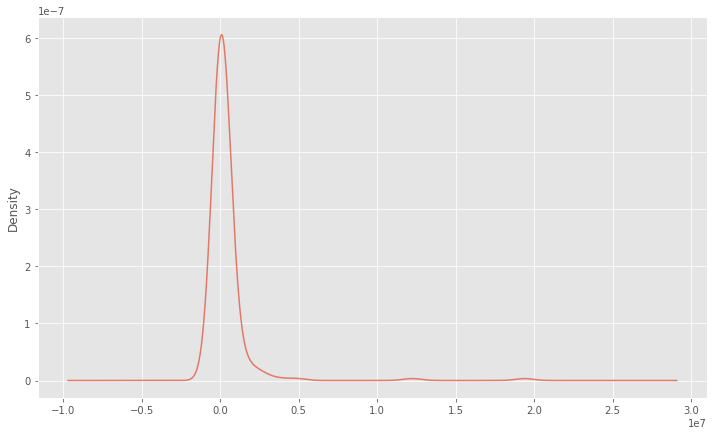

In [ ]:
# Let's finally see how the GDP of all countries is distributed

gdp_2017_df[~gdp_2017_df['rank'].isna()]['GDP (US $ - million)'].plot(kind='kde', figsize=(12,7), alpha = 0.7)

Let's just see how the GDP data from 2017 correlates with the gender gap data from 2016

In [ ]:
merged_gender_gap_gdp_df = pd.merge(left=gender_gap_df_dict[data], right=gdp_2017_df[['Country', 'GDP (US $ - million)']], how='inner', left_on='Country', right_on='Country')

In [ ]:
merged_gender_gap_gdp_df[score_cols+['GDP (US $ - million)', 'Country']]

,Overall Index Score,Economic Participation and Opportunity Subindex Score,Educational Attainment Subindex Score,Health and Survival Subindex Score,Political Empowerment Subindex Score,GDP (US $ - million),Country
0,0.873670,0.806184,1.000000,0.969801,0.718696,23909.3,Iceland
1,0.845047,0.793658,1.000000,0.979558,0.606971,251885,Finland
2,0.841951,0.818156,0.999801,0.974075,0.575774,398832,Norway
3,0.815413,0.802349,0.999233,0.973884,0.486186,538040,Sweden
4,0.799811,0.816934,0.957830,0.972313,0.452167,9135.45,Rwanda
...,...,...,...,...,...,...,...
132,0.590517,0.593791,0.733018,0.948905,0.086353,15334.3,Mali
133,0.587451,0.356671,0.975409,0.970897,0.046826,454013,"Iran, Islamic Rep."
134,0.586693,0.667051,0.618352,0.968133,0.093235,9871.25,Chad
135,0.582871,0.328045,0.960768,0.965882,0.076791,686738,Saudi Arabia


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1342: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


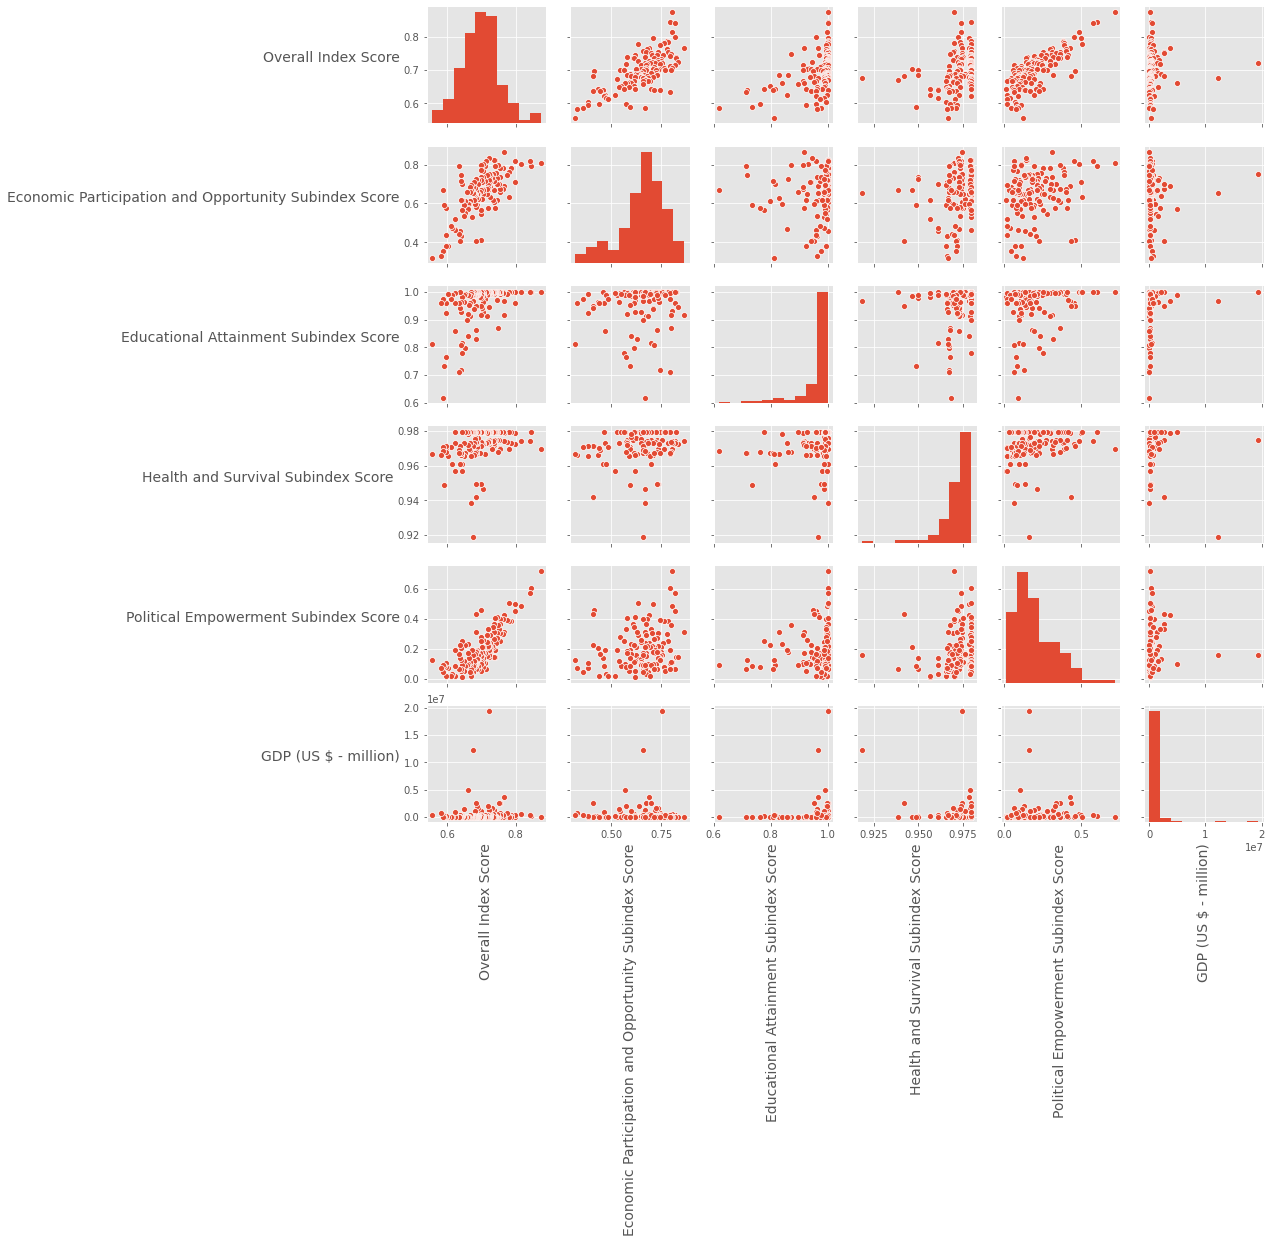

In [ ]:
# Lets see the Correlation of different indexes with the GDP 
plt.rcParams["axes.labelsize"] = 14

g = sns.pairplot(merged_gender_gap_gdp_df[score_cols + ['GDP (US $ - million)']])
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

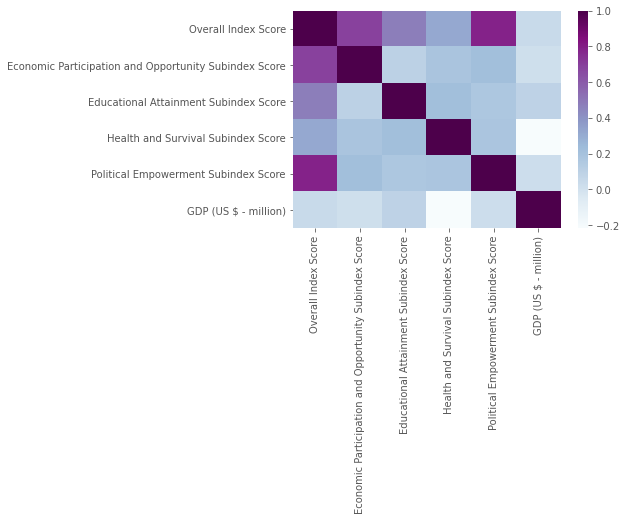

In [ ]:
sns.heatmap(merged_gender_gap_gdp_df[score_cols + ['GDP (US $ - million)']].infer_objects().corr(), cmap="BuPu")

In [ ]:
#Let's see how the number of woman seats in the national parliament relate to the GDP of that country


# merging all the different sources into one
merged_complete_df = pd.merge(left = merged_woman_seats_and_gender_gap_data_2016, right = merged_gender_gap_gdp_df[['Country','GDP (US $ - million)']], on= 'Country', how = 'inner')

In [ ]:
merged_complete_df

,Country,Number of woman seats in parliament,Overall Index Score,Overall Index Rank,Economic Participation and Opportunity Subindex Score,Economic Participation and Opportunity Subindex Rank,Educational Attainment Subindex Score,Educational Attainment Subindex Rank,Health and Survival Subindex Score,Health and Survival Subindex Rank,Political Empowerment Subindex Score,Political Empowerment Subindex Rank,GDP (US $ - million)
0,Angola,36.8,0.643249,117,0.564666,120,0.777654,138,0.979558,1,0.251118,40,122124
1,Albania,22.9,0.703646,62,0.667693,73,0.986321,88,0.946537,141,0.214033,53,13038.5
2,United Arab Emirates,22.5,0.639028,124,0.456052,130,0.999530,32,0.961166,132,0.139362,83,382575
3,Argentina,35.8,0.735214,33,0.615561,101,0.995262,54,0.979558,1,0.350474,22,637430
4,Armenia,10.7,0.669265,102,0.670644,69,0.999840,27,0.938613,143,0.067962,125,11536.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Uruguay,16.2,0.680505,91,0.642715,90,0.998841,39,0.979558,1,0.100908,104,56157
131,United States,19.4,0.721992,45,0.751695,26,1.000000,1,0.974690,62,0.161585,73,19390604
132,Vietnam,26.7,0.700444,65,0.735707,33,0.978198,93,0.949670,138,0.138201,84,223780
133,South Africa,41.8,0.763929,15,0.676732,63,0.995242,55,0.979558,1,0.404183,13,348872


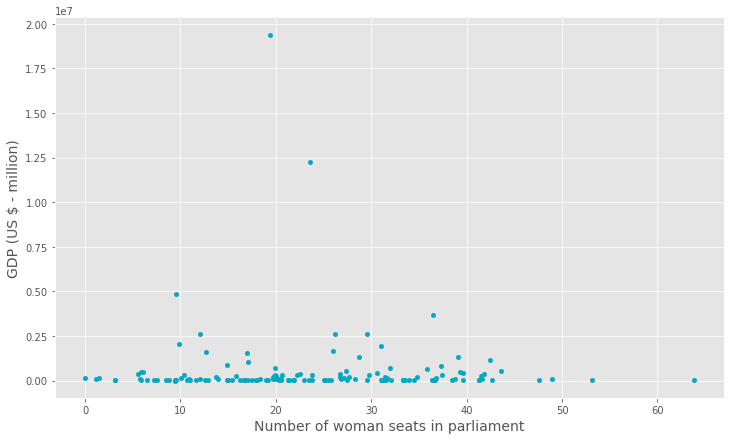

In [ ]:
# Is there a relation between the Number of woman seats in parliament and the GDP (US $ - million)?

merged_complete_df.plot.scatter(x="Number of woman seats in parliament", y = "GDP (US $ - million)", color = colormap[2], figsize=(12,7))

Given these different metrics we can formulate a learning problem here
for one, given these different stats and metrics we can formulate groups/ clusters of these various countries where we can identify a overlaps in most of these commodities to identify these clusters having similar attributes

In [ ]:
# apparently there's a missing value for the country of georgia for the Number of woman seats in parliament dataset for 2016, so we'll interpolate by taking the running average of 2015,2017 and fill in that value
# so that our clustering algorithm can work properly 

merged_complete_df.iloc[45]

Country                                                     Ghana
Number of woman seats in parliament                          10.9
Overall Index Score                                      0.705312
Overall Index Rank                                             59
Economic Participation and Opportunity Subindex Score    0.805409
Economic Participation and Opportunity Subindex Rank           10
Educational Attainment Subindex Score                    0.931016
Educational Attainment Subindex Rank                          119
Health and Survival Subindex Score                       0.972733
Health and Survival Subindex Rank                              85
Political Empowerment Subindex Score                     0.112089
Political Empowerment Subindex Rank                            95
GDP (US $ - million)                                      58996.8
Name: 45, dtype: object

In [ ]:
# apparently there's a missing value for the country of georgia for the Number of woman seats in parliament dataset for 2016, so we'll interpolate by taking the running average of 2015,2017 and fill in that value
# so that our clustering algorithm can work properly 

seats_df = woman_seats_in_national_parliaments_df_dict[data_woman_parliament_seats]
merged_complete_df.loc[45, "Number of woman seats in parliament"] = (seats_df.loc['Georgia', 2015] + seats_df.loc['Georgia', 2015]) / 2

In [ ]:
#Removing the categorical attributes so that clustering algorithms can run on the data

inp_data = merged_complete_df[list(merged_complete_df.columns.drop('Country'))]

In [ ]:
# removing the ranks
inp_data = inp_data[inp_data.columns.drop(rank_cols)]

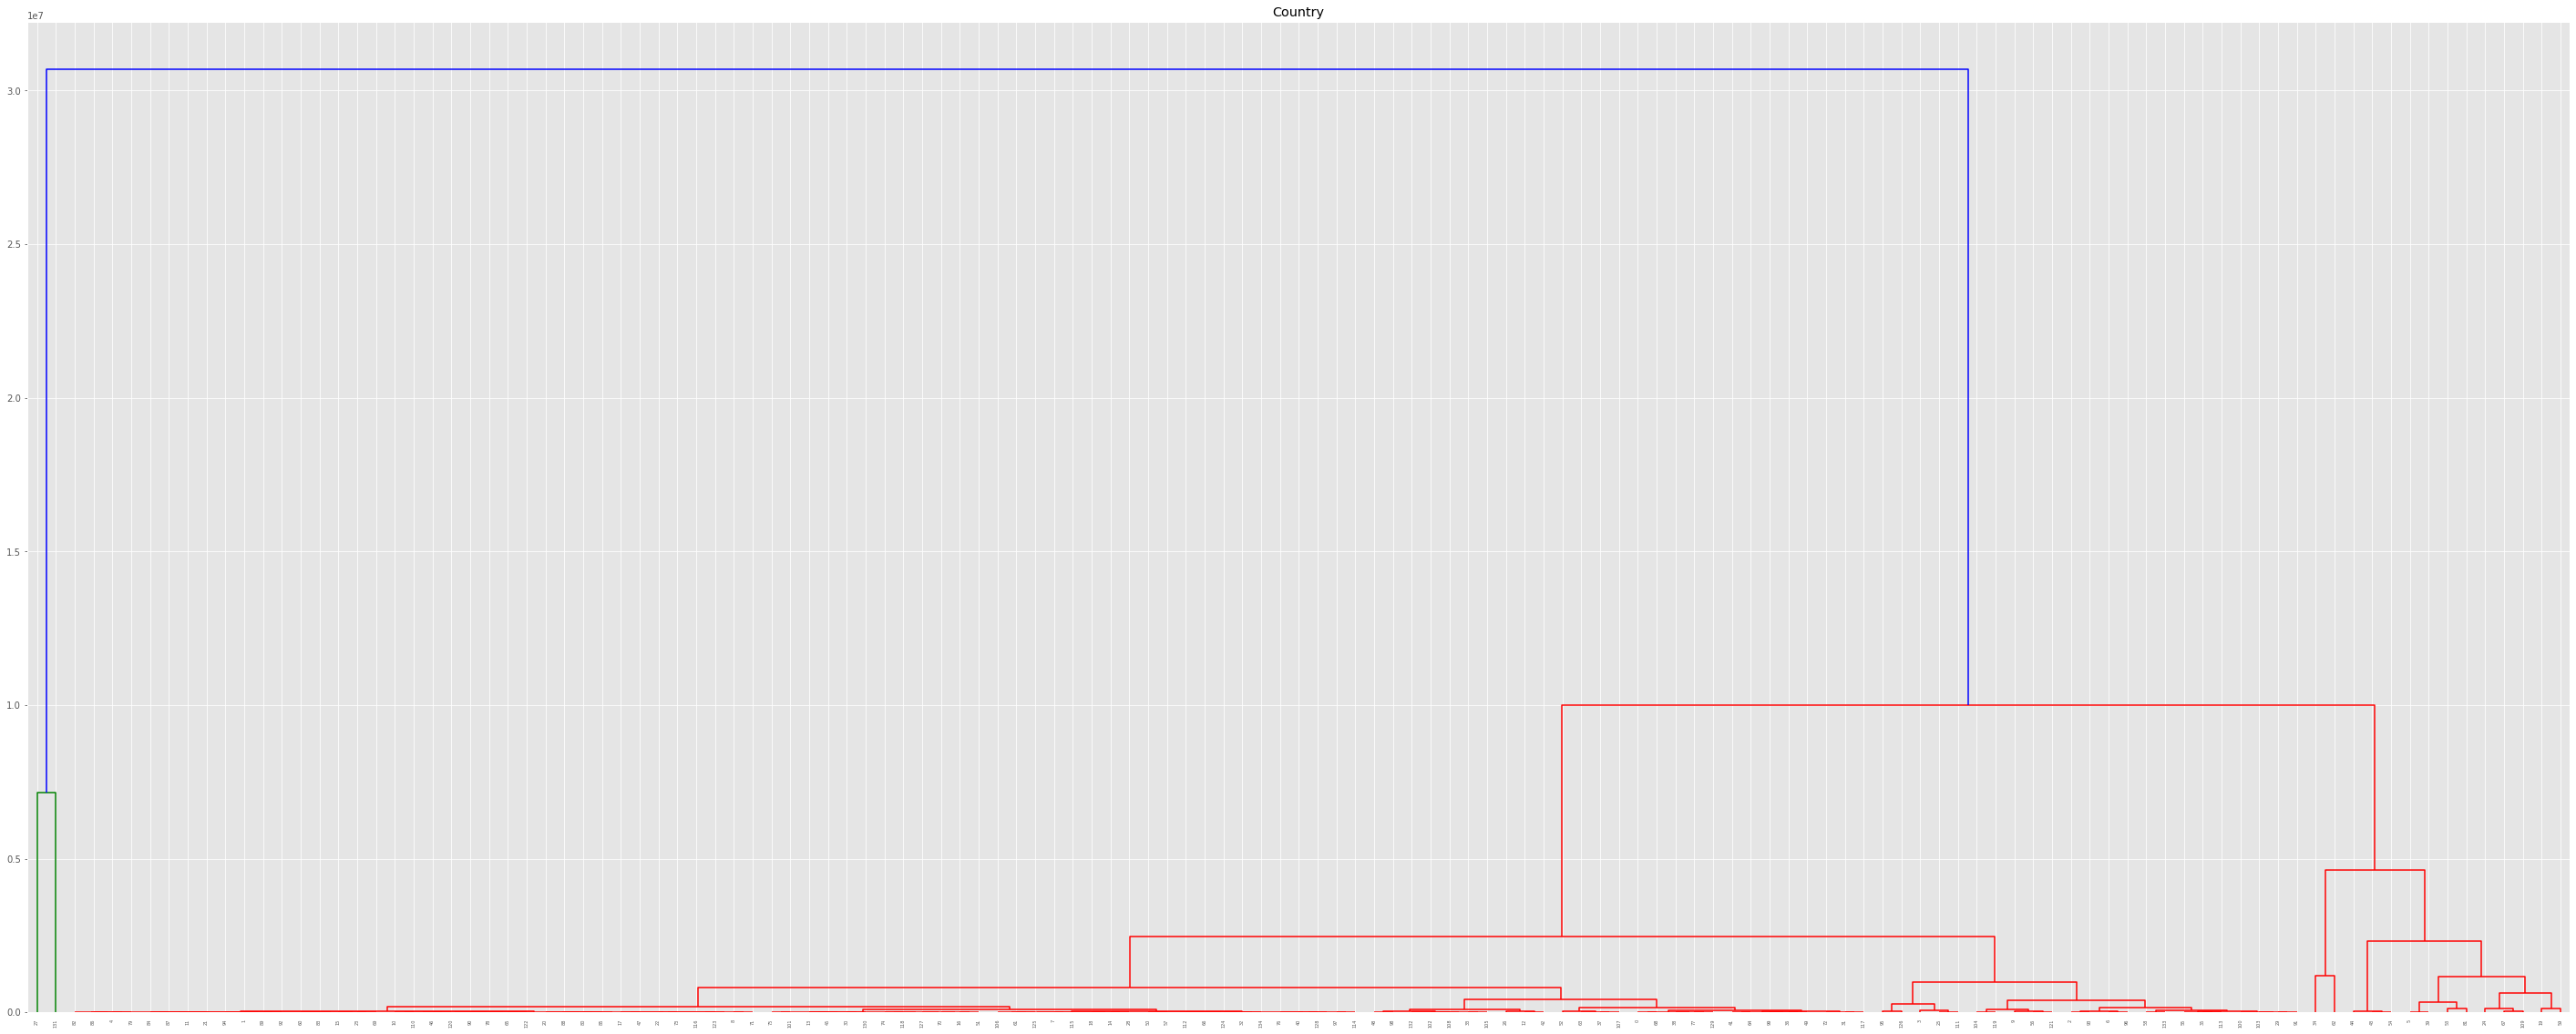

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(50, 20))
plt.title("Country")
dend = shc.dendrogram(shc.linkage(inp_data, method='ward'))

In [ ]:
#showing the whole df
pd.set_option('display.max_rows',500)

In [ ]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(inp_data)
labels = model.labels_

In [ ]:
labels

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2])

In [ ]:
# projecting the inp_data to a lower dimentional data

x = PCA(2)
projected = x.fit_transform(inp_data)

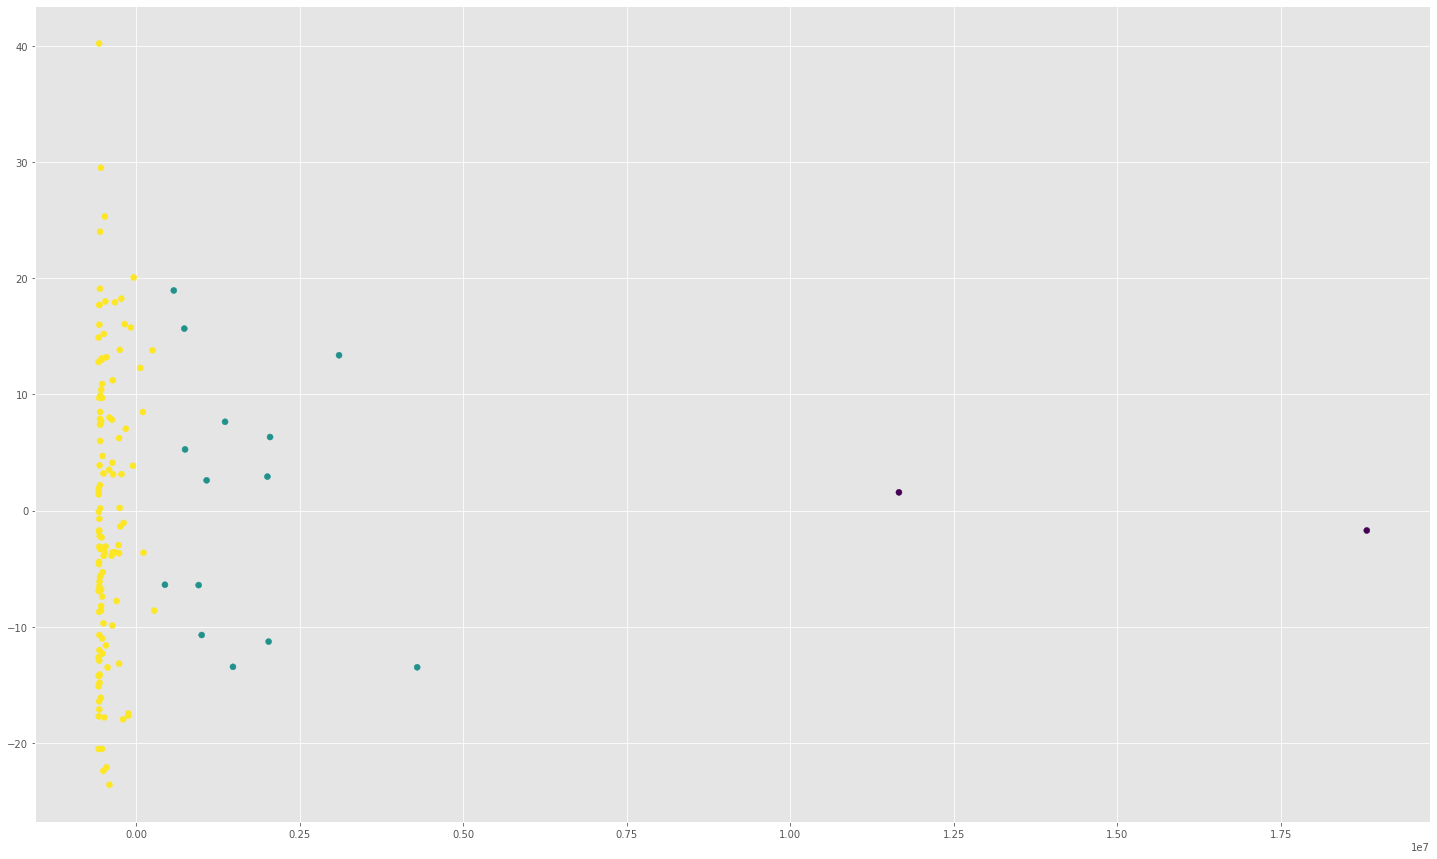

In [ ]:

plt.figure(figsize=(25,15))
plt.scatter(projected[:,0], projected[:,1], c=labels)


In [ ]:
resultant_df = merged_complete_df.copy()

In [ ]:
resultant_df['cluster'] = labels

In [ ]:
resultant_df["cluster"].unique()

array([2, 1, 0])

In [ ]:
resultant_df[resultant_df['cluster']==0]["Country"]

27             China
131    United States
Name: Country, dtype: object

In [ ]:
resultant_df[resultant_df['cluster']==1]["Country"]

5               Australia
19                 Brazil
24                 Canada
34                Germany
39                  Spain
43                 France
44         United Kingdom
53              Indonesia
54                  India
59                  Italy
62                  Japan
67            Korea, Rep.
81                 Mexico
109    Russian Federation
Name: Country, dtype: object

In [ ]:
resultant_df[resultant_df['cluster']==2]["Country"]

0                      Angola
1                     Albania
2        United Arab Emirates
3                   Argentina
4                     Armenia
6                     Austria
7                  Azerbaijan
8                     Burundi
9                     Belgium
10                      Benin
11               Burkina Faso
12                 Bangladesh
13                   Bulgaria
14                    Bahrain
15     Bosnia and Herzegovina
16                    Belarus
17                     Belize
18                    Bolivia
20                   Barbados
21          Brunei Darussalam
22                     Bhutan
23                   Botswana
25                Switzerland
26                      Chile
28                   Cameroon
29                   Colombia
30                 Costa Rica
31                       Cuba
32                     Cyprus
33             Czech Republic
35                    Denmark
36         Dominican Republic
37                    Algeria
38        

In [ ]:
resultant_df[resultant_df['cluster']==3]

,Country,Number of woman seats in parliament,Overall Index Score,Overall Index Rank,Economic Participation and Opportunity Subindex Score,Economic Participation and Opportunity Subindex Rank,Educational Attainment Subindex Score,Educational Attainment Subindex Rank,Health and Survival Subindex Score,Health and Survival Subindex Rank,Political Empowerment Subindex Score,Political Empowerment Subindex Rank,GDP (US $ - million),cluster
